In [2]:
!pip install -q espnet==0.10.6 
!echo 'espnet installed'
!pip install -q pypinyin 
!echo 'pypinyin install'
!pip install -qU parallel-wavegan
!echo 'PWGAN installed'

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/pytorch_p38/bin/python -m pip install --upgrade pip' command.


In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display
import IPython.display as ipd


In [2]:
from espnet2.bin.tts_inference import Text2Speech
from espnet2.utils.types import str_or_none

<h1>Load model<h1>

In [25]:
pwd


'/home/ec2-user/SageMaker'

In [23]:
# %%bash

# src=s3://commonvoicesdataset/Text2Speech/GermanMale/German_Male_char_22050Hz/exp/tts_stats_raw_char_tacotron/
# dst=/home/ec2-user/SageMaker/GermanData/exp
# # echo $src

# echo $dst
!aws s3 cp s3://commonvoicesdataset/Text2Speech/GermanMale/German_Male_char_22050Hz/exp/tts_stats_raw_char_tacotron/  /home/ec2-user/SageMaker/GermanData/exp/tts_stats_raw_char_tacotron --recursive

download: s3://commonvoicesdataset/Text2Speech/GermanMale/German_Male_char_22050Hz/exp/tts_stats_raw_char_tacotron/logdir/stats.1.log to GermanData/exp/logdir/stats.1.log
download: s3://commonvoicesdataset/Text2Speech/GermanMale/German_Male_char_22050Hz/exp/tts_stats_raw_char_tacotron/logdir/stats.1/config.yaml to GermanData/exp/logdir/stats.1/config.yaml
download: s3://commonvoicesdataset/Text2Speech/GermanMale/German_Male_char_22050Hz/exp/tts_stats_raw_char_tacotron/logdir/stats.1/valid/feats_stats.npz to GermanData/exp/logdir/stats.1/valid/feats_stats.npz
download: s3://commonvoicesdataset/Text2Speech/GermanMale/German_Male_char_22050Hz/exp/tts_stats_raw_char_tacotron/logdir/stats.1/train/feats_lengths_stats.npz to GermanData/exp/logdir/stats.1/train/feats_lengths_stats.npz
download: s3://commonvoicesdataset/Text2Speech/GermanMale/German_Male_char_22050Hz/exp/tts_stats_raw_char_tacotron/logdir/stats.1/train/stats_keys to GermanData/exp/logdir/stats.1/train/stats_keys
download: s3://

In [30]:
# config file

!aws s3 cp \
s3://commonvoicesdataset/Text2Speech/GermanMale/German_Male_char_22050Hz/exp/tts_train_tacotron2_raw_char_tacotron/config.yaml /home/ec2-user/SageMaker/GermanData/exp/tts_train_raw_char_tacotron/


download: s3://commonvoicesdataset/Text2Speech/GermanMale/German_Male_char_22050Hz/exp/tts_train_tacotron2_raw_char_tacotron/config.yaml to GermanData/exp/tts_train_raw_char_tacotron/config.yaml


In [31]:
#model
!aws s3 cp s3://commonvoicesdataset/Text2Speech/GermanMale/German_Male_char_22050Hz/exp/tts_train_tacotron2_raw_char_tacotron/200epoch.pth   /home/ec2-user/SageMaker/GermanData/exp/tts_train_raw_char_tacotron/

download: s3://commonvoicesdataset/Text2Speech/GermanMale/German_Male_char_22050Hz/exp/tts_train_tacotron2_raw_char_tacotron/200epoch.pth to GermanData/exp/tts_train_raw_char_tacotron/200epoch.pth


In [34]:
#import decoder

# /home/ec2-user/SageMaker/GermanData/decoder
# config file

!aws s3 cp s3://commonvoicesdataset/Text2Speech/GermanMale/German_Male_char_22050Hz/decoder/stats.h5  /home/ec2-user/SageMaker/GermanData/decoder
    
    
#model file 
!aws s3 cp s3://commonvoicesdataset/Text2Speech/GermanMale/German_Male_char_22050Hz/decoder/checkpoint-400000steps.pkl  /home/ec2-user/SageMaker/GermanData/decoder


# stats
!aws s3 cp s3://commonvoicesdataset/Text2Speech/GermanMale/German_Male_char_22050Hz/decoder/config.yml  /home/ec2-user/SageMaker/GermanData/decoder

download: s3://commonvoicesdataset/Text2Speech/GermanMale/German_Male_char_22050Hz/decoder/stats.h5 to GermanData/decoder/stats.h5
download: s3://commonvoicesdataset/Text2Speech/GermanMale/German_Male_char_22050Hz/decoder/checkpoint-400000steps.pkl to GermanData/decoder/checkpoint-400000steps.pkl
download: s3://commonvoicesdataset/Text2Speech/GermanMale/German_Male_char_22050Hz/decoder/config.yml to GermanData/decoder/config.yml


In [5]:
import os
model_root = '/home/ec2-user/SageMaker/GermanData/exp/tts_train_raw_char_tacotron'

model = '200epoch.pth'
model_file = os.path.join(model_root,model)
print(model_file)

vocoder= 'checkpoint-400000steps.pkl'
root = '/home/ec2-user/SageMaker/GermanData/decoder/'
                    
vocoder_file = os.path.join(root,vocoder)
print(vocoder_file)

/home/ec2-user/SageMaker/GermanData/exp/tts_train_raw_char_tacotron/200epoch.pth
/home/ec2-user/SageMaker/GermanData/decoder/checkpoint-400000steps.pkl


In [7]:
%cd /home/ec2-user/SageMaker/GermanData/

/home/ec2-user/SageMaker/GermanData


In [8]:
tts_GL = Text2Speech.from_pretrained(model_file=model_file)

In [9]:
tts_WGAN = Text2Speech.from_pretrained(model_file=model_file,vocoder_file=vocoder_file)

In [10]:
cd /home/ec2-user/SageMaker/GermanData/exp/

/home/ec2-user/SageMaker/GermanData/exp


In [11]:
text = 'Hi. Ich hoffe, Sie fühlen sich heute gut'

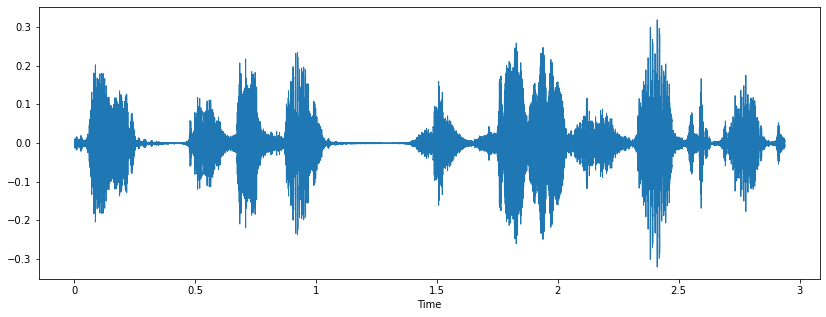

In [12]:
#decode input 
wav = tts_GL(text)["wav"]
#plot wave
sr = 22050
wav1 = wav.cpu().detach().numpy()
plt.figure(figsize=(14, 5))
librosa.display.waveshow(wav1, sr=22050)
#listen to results
ipd.Audio(wav, rate=sr) # load a NumPy array

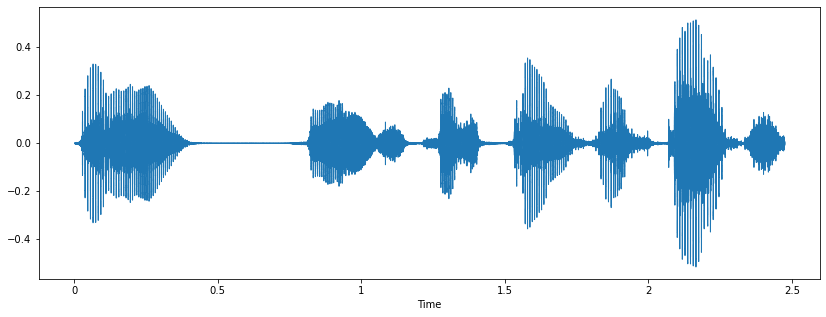

In [14]:
#decode input 
wav = tts_WGAN(text)["wav"]
#plot wave
sr = 22050
wav1 = wav.cpu().detach().numpy()
plt.figure(figsize=(14, 5))
librosa.display.waveshow(wav1, sr=22050)
#listen to results
ipd.Audio(wav, rate=sr) # load a NumPy array

In [ ]:
%%writefile /home/ec2-user/SageMaker/samples.txt
0|German_TTS_000000|In Afghanistan gilt kein generelles Tempolimit auf Autobahnen.
1|German_TTS_000001|Das ist doch viel witziger.
2|German_TTS_000002|ich werde nicht wieder lachen
3|German_TTS_000003|Es ist vergessen.
4|German_TTS_000004|Findest du nicht auch?
5|German_TTS_000005|Mein Nachname ist Sonderegger.
6|German_TTS_000006|Bald hat er sein Abi.
7|German_TTS_000007|Wie schätzen Sie mich ein?
8|German_TTS_000008|Ich sollte Grabräuber werden.
9|German_TTS_000009|Es kommen sowieso jedes Jahr die gleichen Fragen.
10|German_TTS_000010|Kannst du das lesen?

In [ ]:
wavs_folder_path = '/home/ec2-user/SageMaker/espnet/egs2/German_Male/tts1/wavs'

with open('/home/ec2-user/SageMaker/samples.txt','r') as file:
    lines = file.readlines()

sample_num = []
wave_name  = []
text       =[]
wave_path  = []
data_dict  = {}
for idx,line in enumerate(lines):
    sample_num.append(line.split('|')[0])
    wave_path.append(os.path.join(wavs_folder_path,line.split('|')[1]))
    wave_name.append(line.split('|')[1])
    text.append(line.split('|')[2].rstrip())
    data_dict['wave_num_'+str(idx)] = {'wav_path':wave_path[idx],'text':text[idx],'wav_name':wave_name[idx]}

In [ ]:
data_dict['wave_num_0']

In [ ]:
import shutil 
import soundfile as sf

In [ ]:
# create_resutls folder
if not (os.path.isdir('/home/ec2-user/SageMaker/Synthesis_inference_results')):
    os.mkdir('/home/ec2-user/SageMaker/Synthesis_inference_results')
    
for key,val in data_dict.items():
#     print(val['text'])
    text =val['text']
    wav_pat = val['wav_path']+'.wav'
    generated_wave = tts_WGAN(text)["wav"]
    generated_wave_name ='s'+val['wav_name']+'.wav'
    dump_path = os.path.join('/home/ec2-user/SageMaker/Synthesis_inference_results',generated_wave_name)
    sf.write(dump_path, generated_wave, samplerate=22050)
    shutil.copy(wav_pat,'/home/ec2-user/SageMaker/Synthesis_inference_results')

In [ ]:
import os
model_root = '/home/ec2-user/SageMaker/espnet/egs2/German_Male/tts1/exp/tts_train_tacotron2_raw_char_tacotron'

model = '115epoch.pth'
model_file = os.path.join(model_root,model)
print(model_file)

vocoder= 'checkpoint-400000steps.pkl'
root = '/home/ec2-user/SageMaker/espnet/egs2/German_Male/tts1/decoder/'
vocoder_file = os.path.join(root,vocoder)
print(vocoder_file)



text = 'Die Nutzung dieses Angebotes ist für Sie kostenlos.'

ttsv = Text2Speech.from_pretrained(model_file=model_file,vocoder_file=vocoder_file)


wav = ttsv(text)["wav"]
# sr = 22050
wav1 = wav.cpu().detach().numpy()


plt.figure(figsize=(14, 5))
librosa.display.waveshow(wav1, sr=22050)

ipd.Audio(wav, rate=22050) # load a NumPy array

